# Analysis of manufacturing employment for various industry sectors

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

import 2015 ASM data

In [2]:
df15 = pd.read_csv('ASM_2015_31GS101.csv')
df15 = df15[df15['YEAR.id']=='2015']
columns_2015 = ['NAICS.id', 'NAICS.display-label', 'EMP', 'EMPAVPW']
df15 = df15[columns_2015]

import 2005 ASM data

In [3]:
df05 = pd.read_csv('ASM_2006_31GS101.csv')
df05 = df05[df05['YEAR.id']=='2005']
columns_2005 = ['NAICS.id', 'EMPSMAO', 'EMPAVPW']
df05 = df05[columns_2005]

some data cleaning and math

In [6]:
df = pd.merge(df15, df05, on='NAICS.id')
df.columns = ['id', 'sector', 'emp 2015', 'prod 2015', 'emp 2005', 'prod 2005']
df['emp 2015'] = df['emp 2015'].astype(float)
df['prod 2015'] = df['prod 2015'].astype(float)
df['emp 2005'] = df['emp 2005'].astype(float)
df['prod 2005'] = df['prod 2005'].astype(float)

df['change emp'] = df['emp 2015'] - df['emp 2005']
df['percent change emp'] = df['change emp'] / df['emp 2005'] * 100
df['change prod'] = df['prod 2015'] - df['prod 2005']
df['percent change prod'] = df['change prod'] / df['prod 2005'] * 100

df_sorted = df.sort_values('change emp', ascending = False)
df_categories = df_sorted.where(df['id'].str.len() < 4).dropna()
df_best = df_categories.iloc[:5]
df_worst = df_categories.iloc[-5:]

### Plot of best and worst performing large manufacturing sectors

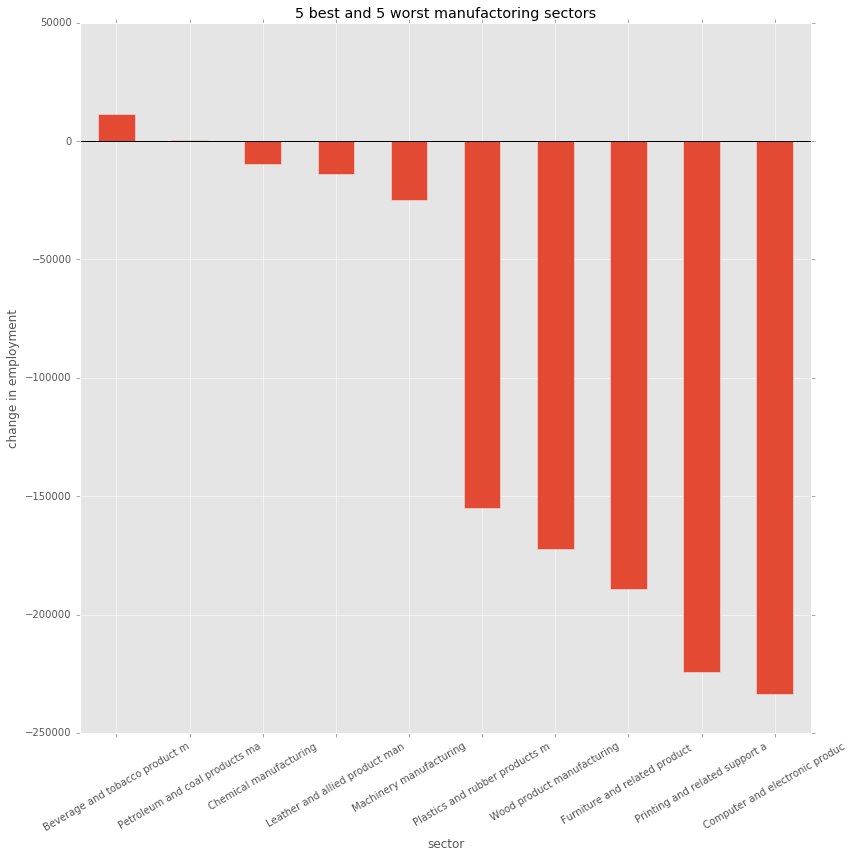

In [9]:
fig, ax = plt.subplots()
df_bestworst = pd.merge(df_best, df_worst, how='outer')
df_bestworst = df_bestworst.sort_values('change emp', ascending = False)
df_bestworst = df_bestworst.set_index(df_bestworst['sector'].str[:30])
df_bestworst['change emp'].plot(kind='bar'); plt.axhline(0, color='k')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)
ax.set_ylabel('change in employment')
ax.set_title('5 best and 5 worst manufactoring sectors')
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()

create dataframes of some subsectors

In [10]:
df_transport = df_sorted.where(df_sorted['id'].str.startswith('336')).dropna()
df_beverage = df_sorted.where(df_sorted['id'].str.startswith('312')).dropna()
df_petroleum = df_sorted.where(df_sorted['id'].str.startswith('324')).dropna()
df_chemical = df_sorted.where(df_sorted['id'].str.startswith('325')).dropna()

### Plot of the Petroleum and Coal manufacturing subsector

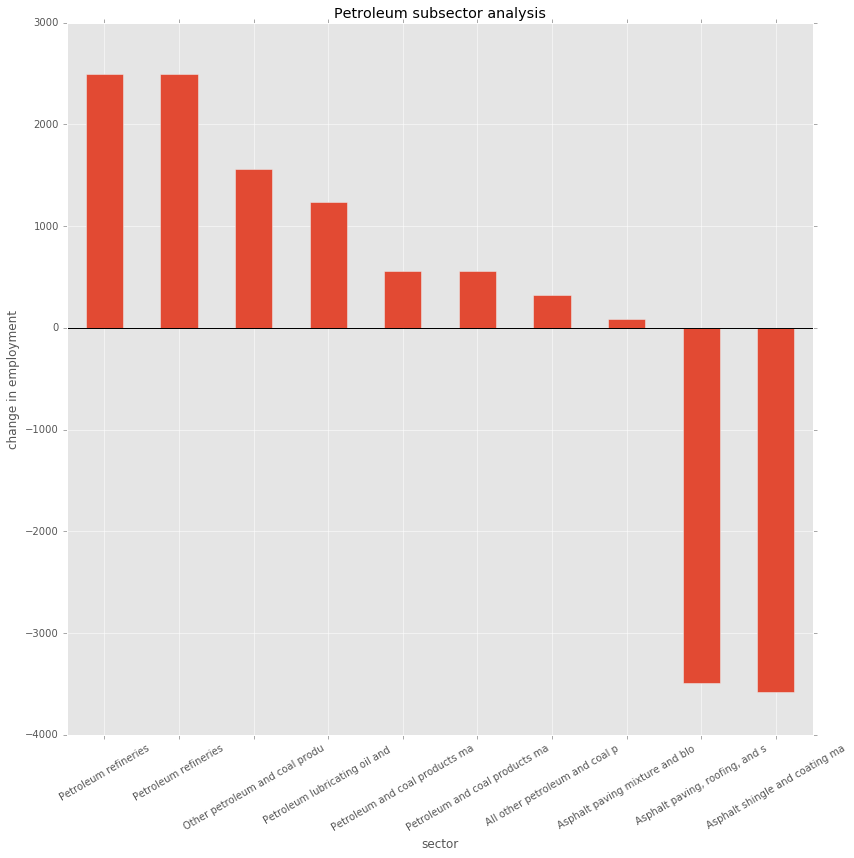

In [11]:
fig, ax = plt.subplots()
df_petroleum = df_petroleum.set_index(df_petroleum['sector'].str[:30])
df_petroleum['change emp'].plot(kind='bar'); plt.axhline(0, color='k')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)
ax.set_ylabel('change in employment')
ax.set_title('Petroleum subsector analysis')
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()